In [1]:
import pandas as pd
df_test = pd.read_csv("data_test_fix.csv")
df_test

,Nomor,Judul,Kategori,Portal,Labeling
0,1,Alasan Zeekr Berani Jual Mobil Listrik Harga R...,Automotive,Detik,0
1,2,"Bisa Diajak 'Kerja Keras', Ini Peminat Mobil L...",Automotive,Detik,1
2,3,Raffi Ahmad Beli Mobil Listrik di Pameran GJAW,Automotive,Detik,0
3,4,Lihat dari Dekat Mobil Listrik 'Murah' Bertamp...,Automotive,Detik,0
4,5,"Prabowo Nyoblos Pilkada, ke TPS Naik Mobil Mau...",Automotive,Detik,1
...,...,...,...,...,...
3294,3295,Quran Tak Menyediakan Jawaban atas Semua Masalah,wawancara,Tempo,1
3295,3296,Aldila Sutjiadi: Target Saya Berikutnya Masuk ...,wawancara,Tempo,0
3296,3297,Negara Berutang kepada Pekerja Migran,wawancara,Tempo,0
3297,3298,"Rianto, Melawan Stigma Buruk Lengger",wawancara,Tempo,0


In [2]:
df_test['Labeling'].value_counts()

Labeling
0    2701
1     598
Name: count, dtype: int64

In [3]:
import re
def preprocessed(text):
    # Pastikan input berupa string
    if not isinstance(text, str):
        return text  # Jika bukan string, kembalikan nilainya tanpa perubahan
    
    # Konversi ke huruf kecil
    text = text.lower()

    # Menghapus non-alfabetik kecuali angka dan spasi
    # text = re.sub(r'[^a-zA-Z0-9\s]+', '', text)

    return text

df_test['Judul_clean'] = df_test['Judul'].apply(preprocessed)
df_test

,Nomor,Judul,Kategori,Portal,Labeling,Judul_clean
0,1,Alasan Zeekr Berani Jual Mobil Listrik Harga R...,Automotive,Detik,0,alasan zeekr berani jual mobil listrik harga r...
1,2,"Bisa Diajak 'Kerja Keras', Ini Peminat Mobil L...",Automotive,Detik,1,"bisa diajak 'kerja keras', ini peminat mobil l..."
2,3,Raffi Ahmad Beli Mobil Listrik di Pameran GJAW,Automotive,Detik,0,raffi ahmad beli mobil listrik di pameran gjaw
3,4,Lihat dari Dekat Mobil Listrik 'Murah' Bertamp...,Automotive,Detik,0,lihat dari dekat mobil listrik 'murah' bertamp...
4,5,"Prabowo Nyoblos Pilkada, ke TPS Naik Mobil Mau...",Automotive,Detik,1,"prabowo nyoblos pilkada, ke tps naik mobil mau..."
...,...,...,...,...,...,...
3294,3295,Quran Tak Menyediakan Jawaban atas Semua Masalah,wawancara,Tempo,1,quran tak menyediakan jawaban atas semua masalah
3295,3296,Aldila Sutjiadi: Target Saya Berikutnya Masuk ...,wawancara,Tempo,0,aldila sutjiadi: target saya berikutnya masuk ...
3296,3297,Negara Berutang kepada Pekerja Migran,wawancara,Tempo,0,negara berutang kepada pekerja migran
3297,3298,"Rianto, Melawan Stigma Buruk Lengger",wawancara,Tempo,0,"rianto, melawan stigma buruk lengger"


In [ ]:
# Memisahkan fitur teks ('Judul_clean') dan target ('Labeling')
df_test['Labeling'] = df_test['Labeling'].map({1: 'clickbait', 0: 'non-clickbait'})

X = df_test['Judul_clean']  # Kolom teks untuk prediksi
y = df_test['Labeling']     # Target (label)

0       non-clickbait
1           clickbait
2       non-clickbait
3       non-clickbait
4           clickbait
            ...      
3294        clickbait
3295    non-clickbait
3296    non-clickbait
3297    non-clickbait
3298        clickbait
Name: Labeling, Length: 3299, dtype: object

## EDA

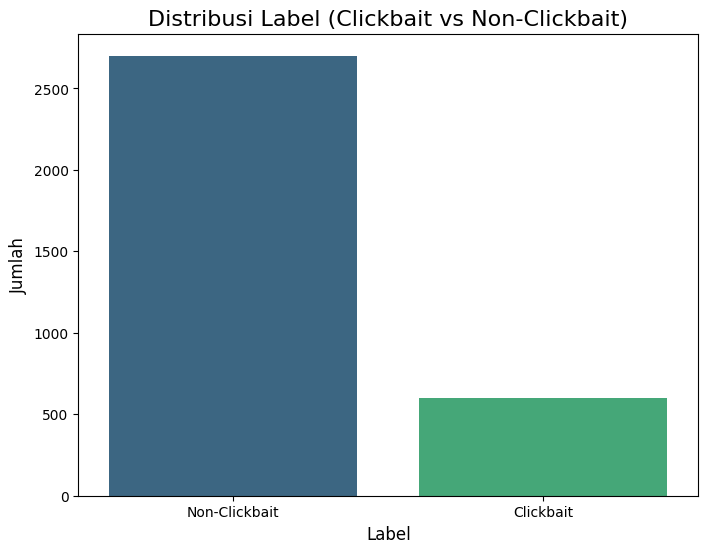

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi label
plt.figure(figsize=(8, 6))
sns.countplot(x='Labeling', data=df_test, palette='viridis')
plt.title('Distribusi Label (Clickbait vs Non-Clickbait)', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Clickbait', 'Clickbait'], fontsize=10)
plt.show()

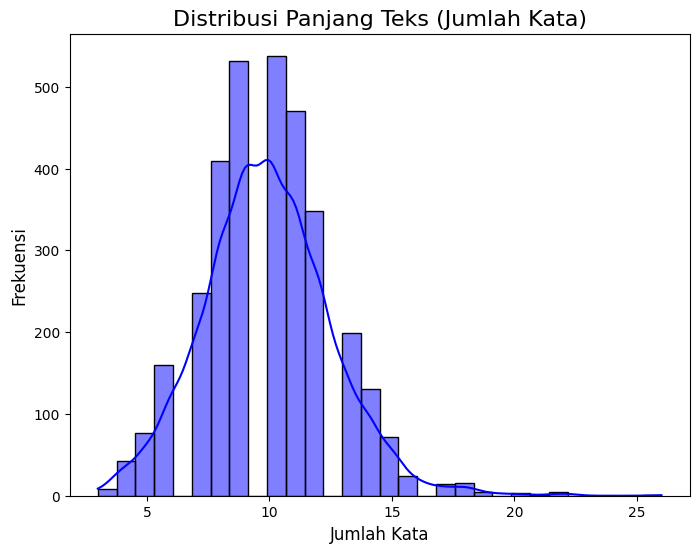

In [5]:
# Tambahkan kolom panjang teks
df_test['Judul_clean_split'] = df_test['Judul_clean'].apply(lambda x: len(x.split()))

# Visualisasi panjang teks
plt.figure(figsize=(8, 6))
sns.histplot(df_test['Judul_clean_split'], kde=True, color='blue', bins=30)
plt.title('Distribusi Panjang Teks (Jumlah Kata)', fontsize=16)
plt.xlabel('Jumlah Kata', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


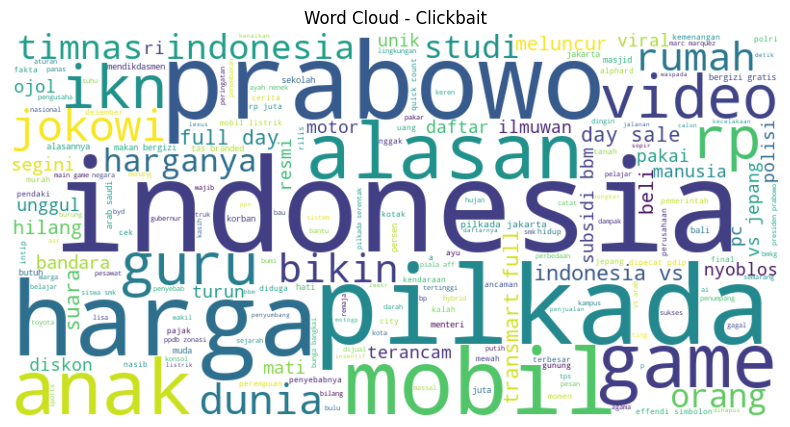

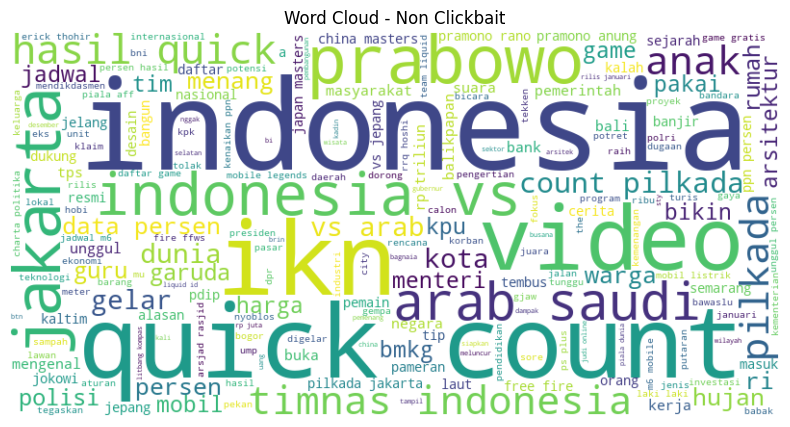

In [6]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Unduh stopwords jika diperlukan
nltk.download('stopwords')

# Mengambil stopwords bahasa Inggris dari NLTK (atau bisa diganti dengan stopwords bahasa lain jika diperlukan)
id_stopwords = set(stopwords.words('indonesian'))

# Menambahkan stopwords tambahan jika diperlukan
# custom_stopwords = id_stopwords.union({"monkeypox", "cacar monyet", "cacar"})

text_cb = ' '.join(df_test[df_test['Labeling'] == 1]['Judul_clean'])
text_ncb = ' '.join(df_test[df_test['Labeling'] == 0]['Judul_clean'])

# Buat WordCloud untuk setiap kategori emosi
wordcloud_cb = WordCloud(width=800, height=400,
                        background_color='white',
                        stopwords=id_stopwords).generate(text_cb)

# Plot WordCloud untuk kategori emosi
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_cb, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud - Clickbait")
plt.show()

# Buat WordCloud untuk setiap kategori emosi
wordcloud_ncb = WordCloud(width=800, height=400,
                        background_color='white',
                        stopwords=id_stopwords).generate(text_ncb)

# Plot WordCloud untuk kategori emosi
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ncb, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud - Non Clickbait")
plt.show()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


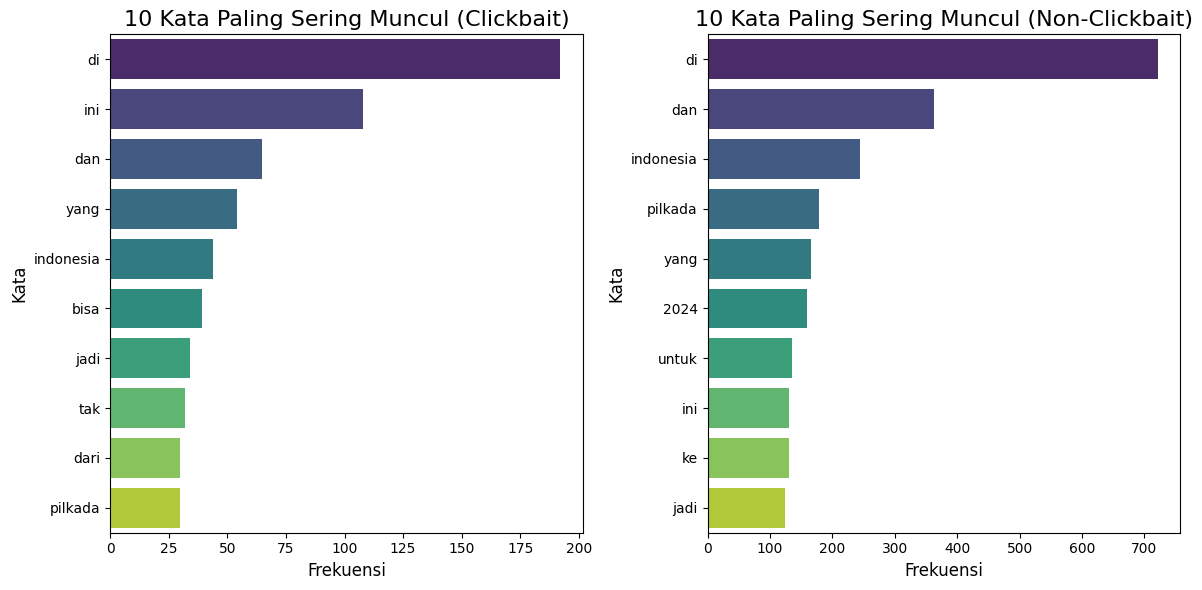

In [7]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

# Unduh stopwords jika diperlukan
nltk.download('stopwords')

# Mengambil stopwords bahasa Inggris dari NLTK (atau bisa diganti dengan stopwords bahasa lain jika diperlukan)
id_stopwords = set(stopwords.words('indonesian'))

# Pisahkan data berdasarkan label
text_cb = ' '.join(df_test[df_test['Labeling'] == 1]['Judul_clean']).split()
text_ncb = ' '.join(df_test[df_test['Labeling'] == 0]['Judul_clean']).split()

# Hitung frekuensi kata untuk masing-masing label
clickbait_word_counts = Counter(text_cb)
non_clickbait_word_counts = Counter(text_ncb)

# Ambil 10 kata paling sering untuk masing-masing label
clickbait_common_words = clickbait_word_counts.most_common(10)
non_clickbait_common_words = non_clickbait_word_counts.most_common(10)

# Pisahkan kata dan frekuensi
clickbait_words, clickbait_counts = zip(*clickbait_common_words)
non_clickbait_words, non_clickbait_counts = zip(*non_clickbait_common_words)

# Visualisasi kata paling sering untuk Clickbait dan Non-Clickbait
plt.figure(figsize=(12, 6))

# Subplot untuk Clickbait
plt.subplot(1, 2, 1)
sns.barplot(x=list(clickbait_counts), y=list(clickbait_words), palette='viridis')
plt.title('10 Kata Paling Sering Muncul (Clickbait)', fontsize=16)
plt.xlabel('Frekuensi', fontsize=12)
plt.ylabel('Kata', fontsize=12)

# Subplot untuk Non-Clickbait
plt.subplot(1, 2, 2)
sns.barplot(x=list(non_clickbait_counts), y=list(non_clickbait_words), palette='viridis')
plt.title('10 Kata Paling Sering Muncul (Non-Clickbait)', fontsize=16)
plt.xlabel('Frekuensi', fontsize=12)
plt.ylabel('Kata', fontsize=12)

plt.tight_layout()
plt.show()


## Modeling

In [5]:
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model_path, features, df_test, misclassified_output_path):
    # Memuat model
    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    # Prediksi dengan model
    predictions = model.predict(features)
    df_test['Prediction'] = predictions

    # Mapping prediksi
    # df_test['Mapped_Prediction'] = df_test['Prediction'].map({'clickbait': 1, 'non-clickbait': 0})

    # Misalkan df_test memiliki kolom 'Labeling'
    y_true = df_test['Labeling']
    y_pred = df_test['Prediction']

    # Menghitung accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Menghitung F1-score
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Membuat confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Menghitung akurasi per kelas
    class_labels = np.unique(y_true)
    for label in class_labels:
        class_accuracy = accuracy_score(y_true[y_true == label], y_pred[y_true == label])
        print(f"Accuracy for class '{label}': {class_accuracy:.2f}")

    # Menampilkan confusion matrix dengan visualisasi
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Menyimpan data yang salah diprediksi
    df_test['Misclassified'] = df_test['Mapped_Prediction'] != df_test['Labeling']
    misclassified = df_test[df_test['Misclassified']]

    if not misclassified.empty:
        misclassified.to_csv(misclassified_output_path, index=False)
        print(f"Data salah prediksi telah disimpan ke {misclassified_output_path}")
    else:
        print("Tidak ada data yang salah prediksi.")

In [9]:
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model_path, features, df_test, misclassified_output_path, feature_extraction_method):
    # Memuat model
    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    # Prediksi dengan model
    predictions = model.predict(features)
    df_test['Prediction'] = predictions

    # Mapping prediksi
    # df_test['Mapped_Prediction'] = df_test['Prediction'].map({'clickbait': 1, 'non-clickbait': 0})

    # Misalkan df_test memiliki kolom 'Labeling'
    y_true = df_test['Labeling']
    y_pred = df_test['Prediction']

    # Menghitung accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Menghitung F1-score
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Membuat confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Menghitung akurasi per kelas
    class_labels = np.unique(y_true)
    for label in class_labels:
        class_accuracy = accuracy_score(y_true[y_true == label], y_pred[y_true == label])
        print(f"Accuracy for class '{label}': {class_accuracy:.2f}")

    # Menampilkan confusion matrix dengan visualisasi
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Menyimpan data yang salah diprediksi
    df_test['Misclassified'] = df_test['Mapped_Prediction'] != df_test['Labeling']
    misclassified = df_test[df_test['Misclassified']]

    if not misclassified.empty:
        misclassified.to_csv(misclassified_output_path, index=False)
        print(f"Data salah prediksi telah disimpan ke {misclassified_output_path}")
    else:
        print("Tidak ada data yang salah prediksi.")

    # Membuat DataFrame untuk menampilkan hasil
    results_df = pd.DataFrame({
        'Feature Extraction': [feature_extraction_method],
        'Model': [model_path.split('/')[-1]],  # Mengambil nama model dari path
        'Accuracy': [accuracy],
        'F1 Score': [f1]
    })

    # Menampilkan tabel hasil
    print("\nHasil Evaluasi Model:")
    print(results_df)

# Contoh pemanggilan fungsi
# evaluate_model('Modeling/Data 2019/models/FastText_KNN.pkl', features_fasttext, df_test, 'misclassified_data.csv', 'FastText')

### TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat TF-IDF vectorizer dan mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer(max_features=500)
features_tfidf = vectorizer.fit_transform(X).toarray()


Accuracy: 0.70
F1 Score: 0.70
Accuracy for class 'clickbait': 0.20
Accuracy for class 'non-clickbait': 0.81


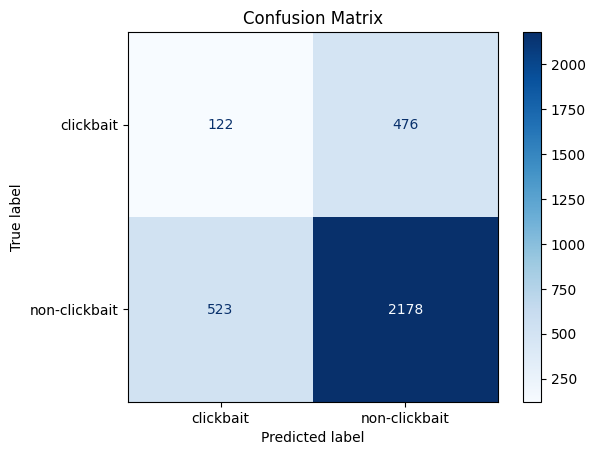

Data salah prediksi telah disimpan ke misclassified_data.csv

Hasil Evaluasi Model:
  Feature Extraction           Model  Accuracy  F1 Score
0             TF-IDF  TF-IDF_KNN.pkl  0.697181  0.701577


In [11]:
evaluate_model('models/TF-IDF_KNN.pkl', features_tfidf, df_test, 'misclassified_data.csv', 'TF-IDF')

# evaluate_model('models/TF-IDF_Random Forest.pkl', features_tfidf, df_test, 'misclassified_tfidf_rf.csv')
# evaluate_model('models/TF-IDF_Naive Bayes.pkl', features_tfidf, df_test, 'misclassified_tfidf_nb.csv')
# evaluate_model('models/TF-IDF_SVM.pkl', features_tfidf, df_test, 'misclassified_tfidf_svm.csv')
# evaluate_model('models/TF-IDF_KNN.pkl', features_tfidf, df_test, 'misclassified_tfidf_knn.csv')

### Bag of Words (BoW)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def extract_bow(X_test, max_features=500): 
    # Membuat objek CountVectorizer dengan max_features
    vectorizer = CountVectorizer(max_features=max_features)
    
    # Menyesuaikan vektor dengan data uji menggunakan transform (bukan fit_transform)
    test_features = vectorizer.fit_transform(X_test).toarray()
    
    return test_features

# Mengekstrak fitur menggunakan BoW
features_bow = extract_bow(X, max_features=500)

Accuracy: 0.66
F1 Score: 0.68
Accuracy for class 'clickbait': 0.26
Accuracy for class 'non-clickbait': 0.75


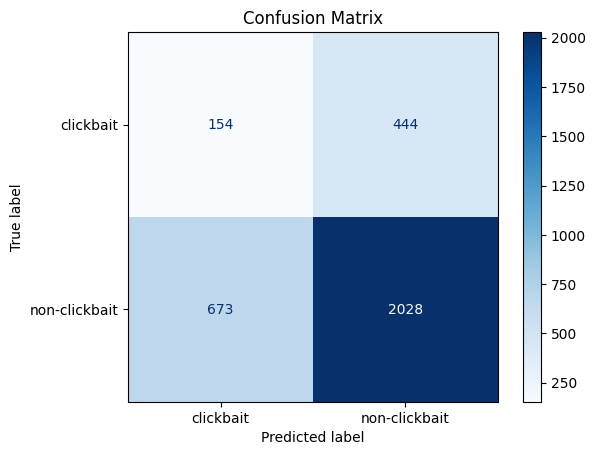

Data salah prediksi telah disimpan ke misclassified_bow_rf.csv
Accuracy: 0.46
F1 Score: 0.52
Accuracy for class 'clickbait': 0.54
Accuracy for class 'non-clickbait': 0.45


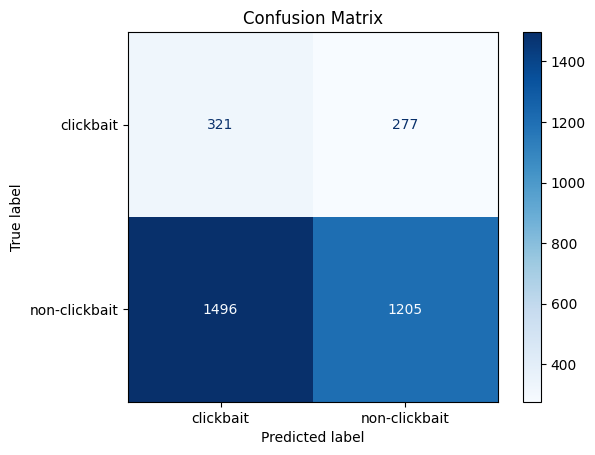

Data salah prediksi telah disimpan ke misclassified_bow_nb.csv
Accuracy: 0.50
F1 Score: 0.56
Accuracy for class 'clickbait': 0.45
Accuracy for class 'non-clickbait': 0.51


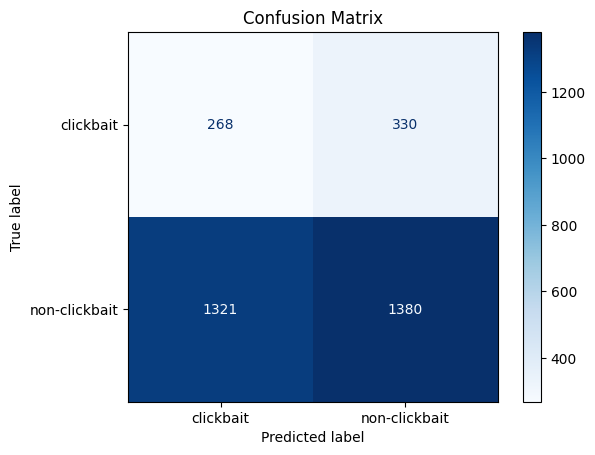

Data salah prediksi telah disimpan ke misclassified_bow_svm.csv
Accuracy: 0.72
F1 Score: 0.72
Accuracy for class 'clickbait': 0.21
Accuracy for class 'non-clickbait': 0.83


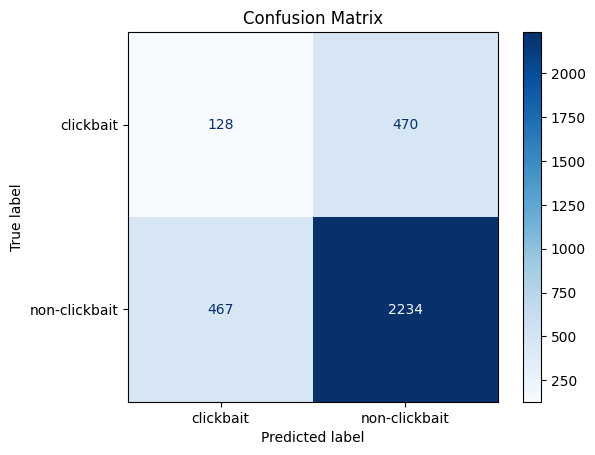

Data salah prediksi telah disimpan ke misclassified_bow_knn.csv


In [46]:
evaluate_model('models/Bag of Words (BOW)_Random Forest.pkl', features_bow, df_test, 'misclassified_bow_rf.csv')
evaluate_model('models/Bag of Words (BOW)_Naive Bayes.pkl', features_bow, df_test, 'misclassified_bow_nb.csv')
evaluate_model('models/Bag of Words (BOW)_SVM.pkl', features_bow, df_test, 'misclassified_bow_svm.csv')
evaluate_model('models/Bag of Words (BOW)_KNN.pkl', features_bow, df_test, 'misclassified_bow_knn.csv')

### GloVe

In [17]:
import numpy as np

def extract_glove(X_test, glove_path): 
    # Memuat GloVe model
    glove_model = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding

    def embed(texts):
        # Menghitung rata-rata vektor untuk setiap teks
        features = []
        for text in texts:
            words = text.split()  # Menghitung kata per kata
            word_vectors = [glove_model[word] for word in words if word in glove_model]  # Ambil vektor GloVe
            if len(word_vectors) == 0:  # Jika tidak ada kata yang ditemukan, gunakan vektor nol
                features.append(np.zeros(300))  # GloVe vektor ukuran 300
            else:
                features.append(np.mean(word_vectors, axis=0))  # Rata-rata vektor kata
        return np.array(features)

    # Ekstraksi fitur untuk X_test
    test_features = embed(X_test)
    return test_features

# Path ke file GloVe (misal, 'glove.6B.300d.txt')
glove_path = 'glove.6B.300d.txt'

# Ekstraksi fitur
features_glove = extract_glove(X, glove_path)

# Menampilkan bentuk hasil
print(features_glove.shape)  # (jumlah_teks, 300)


(3299, 300)


Accuracy: 0.62
F1 Score: 0.66
Accuracy for class 'clickbait': 0.52
Accuracy for class 'non-clickbait': 0.64


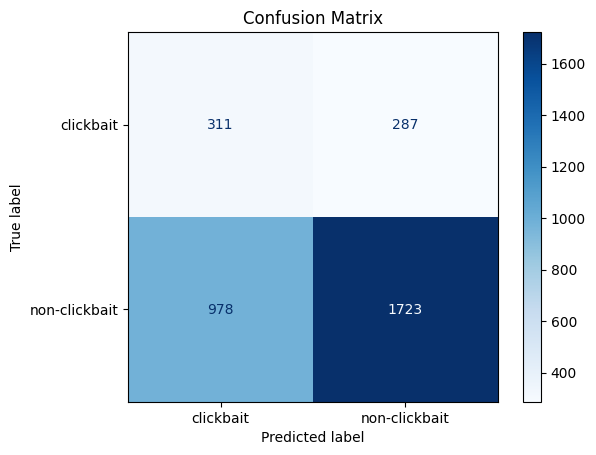

Data salah prediksi telah disimpan ke misclassified_glove_rf.csv
Accuracy: 0.59
F1 Score: 0.64
Accuracy for class 'clickbait': 0.55
Accuracy for class 'non-clickbait': 0.60


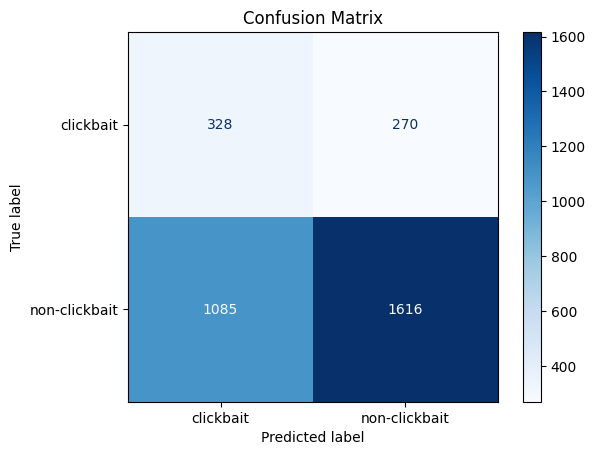

Data salah prediksi telah disimpan ke misclassified_glove_nb.csv
Accuracy: 0.65
F1 Score: 0.68
Accuracy for class 'clickbait': 0.53
Accuracy for class 'non-clickbait': 0.67


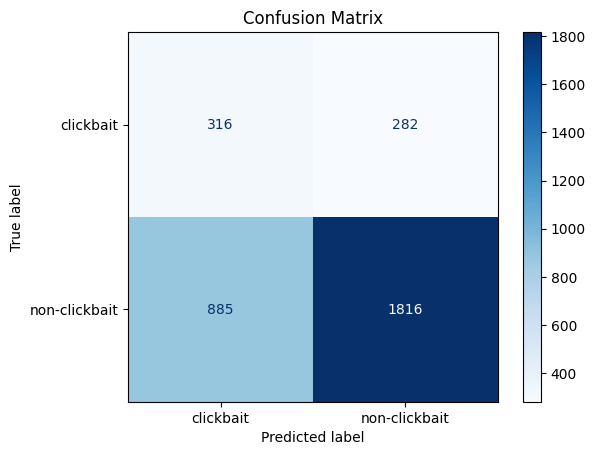

Data salah prediksi telah disimpan ke misclassified_glove_svm.csv
Accuracy: 0.43
F1 Score: 0.47
Accuracy for class 'clickbait': 0.72
Accuracy for class 'non-clickbait': 0.36


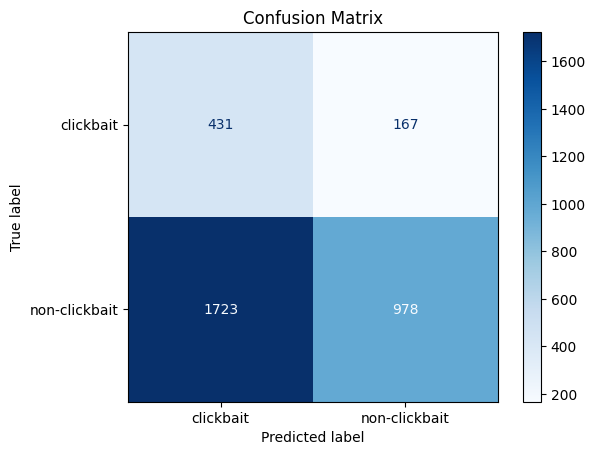

Data salah prediksi telah disimpan ke misclassified_glove_knn.csv


In [34]:
evaluate_model('models/GloVe_Random Forest.pkl', features_glove, df_test, 'misclassified_glove_rf.csv')
evaluate_model('models/GloVe_Naive Bayes.pkl', features_glove, df_test, 'misclassified_glove_nb.csv')
evaluate_model('models/GloVe_SVM.pkl', features_glove, df_test, 'misclassified_glove_svm.csv')
evaluate_model('models/GloVe_KNN.pkl', features_glove, df_test, 'misclassified_glove_knn.csv')

### FastText

In [19]:
from gensim.models import KeyedVectors
import numpy as np

def extract_fasttext(X_test, fasttext_path):
    # Memuat model FastText
    fasttext_model = KeyedVectors.load_word2vec_format(fasttext_path)
    
    # Tokenisasi teks menjadi list kata-kata
    tokenized_test = [text.split() for text in X_test]
    
    # Menghitung rata-rata vektor kata per teks
    test_features = np.array([
        np.mean([fasttext_model.get_vector(word) for word in words if word in fasttext_model]
                or [np.zeros(fasttext_model.vector_size)], axis=0)
        for words in tokenized_test
    ])
    
    return test_features
# Path ke file model FastText yang telah dilatih
fasttext_path = 'cc.id.300.vec'

# Mengekstrak fitur dengan FastText
features_fasttext = extract_fasttext(X, fasttext_path)


Accuracy: 0.68
F1 Score: 0.71
Accuracy for class 'clickbait': 0.56
Accuracy for class 'non-clickbait': 0.70


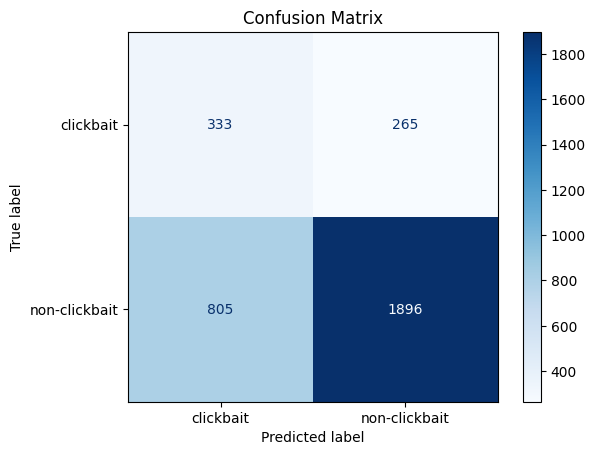

Data salah prediksi telah disimpan ke misclassified_fasttext_rf.csv
Accuracy: 0.42
F1 Score: 0.46
Accuracy for class 'clickbait': 0.80
Accuracy for class 'non-clickbait': 0.33


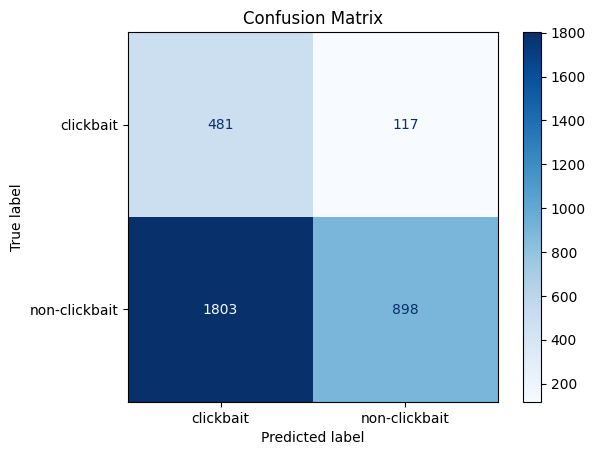

Data salah prediksi telah disimpan ke misclassified_fasttext_nb.csv
Accuracy: 0.67
F1 Score: 0.71
Accuracy for class 'clickbait': 0.56
Accuracy for class 'non-clickbait': 0.70


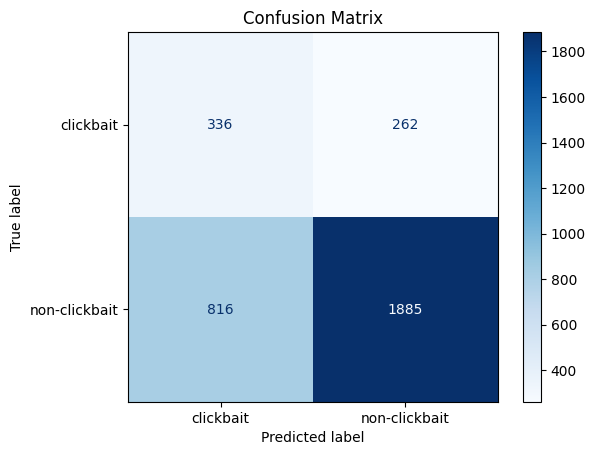

Data salah prediksi telah disimpan ke misclassified_fasttext_svm.csv
Accuracy: 0.54
F1 Score: 0.59
Accuracy for class 'clickbait': 0.69
Accuracy for class 'non-clickbait': 0.51


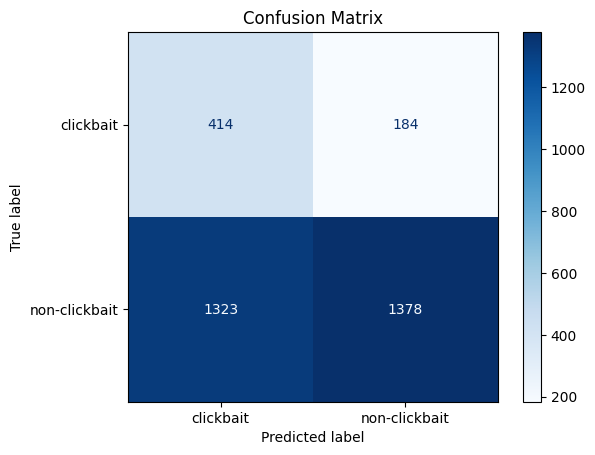

Data salah prediksi telah disimpan ke misclassified_fasttext_knn.csv


In [35]:
evaluate_model('models/FastText_Random Forest.pkl', features_fasttext, df_test, 'misclassified_fasttext_rf.csv')
evaluate_model('models/FastText_Naive Bayes.pkl', features_fasttext, df_test, 'misclassified_fasttext_nb.csv')
evaluate_model('models/FastText_SVM.pkl', features_fasttext, df_test, 'misclassified_fasttext_svm.csv')
evaluate_model('models/FastText_KNN.pkl', features_fasttext, df_test, 'misclassified_fasttext_knn.csv')

### IndoBERT

In [21]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

def extract_indobert(X_test, model_name='indobenchmark/indobert-base-p2', batch_size=32):
    # Periksa perangkat yang tersedia
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Muat tokenizer dan model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name).to(device)
    model.eval()  # Set model ke mode evaluasi
    
    # Fungsi untuk memproses batch
    def embed_batch(texts):
        tokenized = tokenizer(list(texts), padding=True, truncation=True, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = model(**tokenized)
        return outputs.last_hidden_state[:, 0, :].cpu().numpy()  # CLS token
    
    # Proses dalam batch
    features = []
    for i in range(0, len(X_test), batch_size):
        batch_texts = X_test[i:i + batch_size]
        batch_features = embed_batch(batch_texts)
        features.append(batch_features)
    
    # Gabungkan semua batch menjadi satu array
    return np.vstack(features)

# Panggil fungsi extract_indobert
features_idbert = extract_indobert(X, batch_size=16)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Accuracy: 0.70
F1 Score: 0.73
Accuracy for class 'clickbait': 0.67
Accuracy for class 'non-clickbait': 0.70


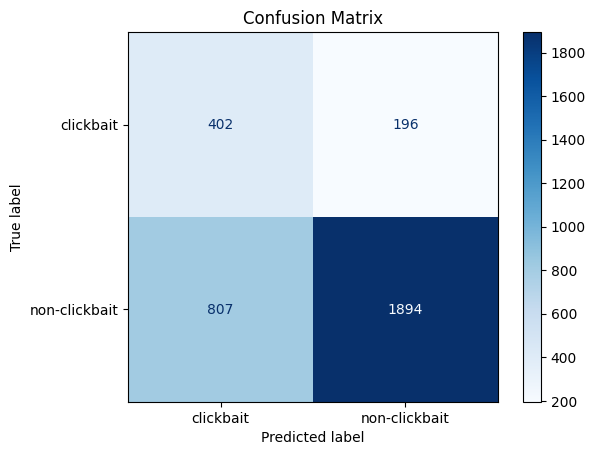

Data salah prediksi telah disimpan ke misclassified_idbert_rf.csv
Accuracy: 0.80
F1 Score: 0.78
Accuracy for class 'clickbait': 0.23
Accuracy for class 'non-clickbait': 0.93


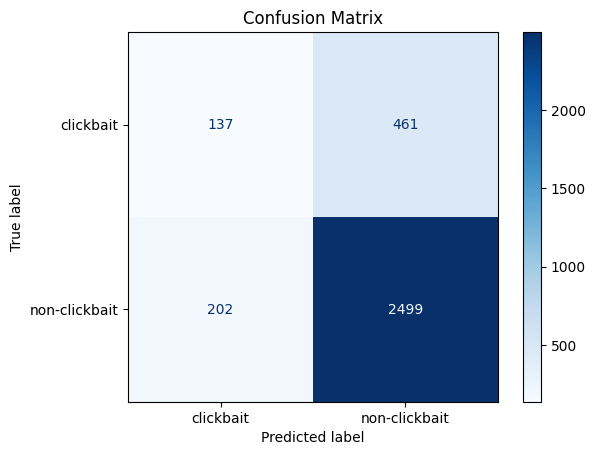

Data salah prediksi telah disimpan ke misclassified_idbert_nb.csv
Accuracy: 0.71
F1 Score: 0.74
Accuracy for class 'clickbait': 0.70
Accuracy for class 'non-clickbait': 0.72


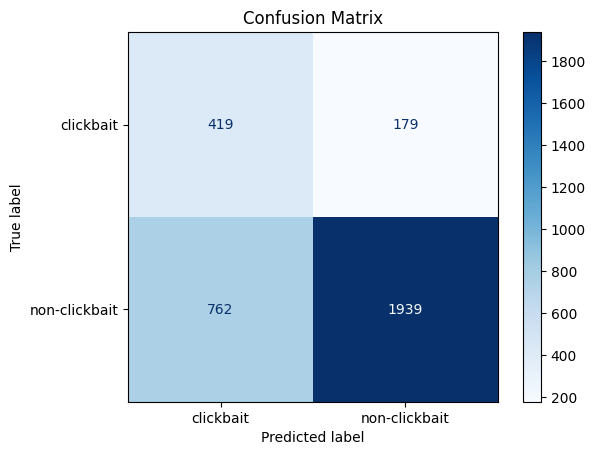

Data salah prediksi telah disimpan ke misclassified_idbert_svm.csv
Accuracy: 0.71
F1 Score: 0.74
Accuracy for class 'clickbait': 0.62
Accuracy for class 'non-clickbait': 0.73


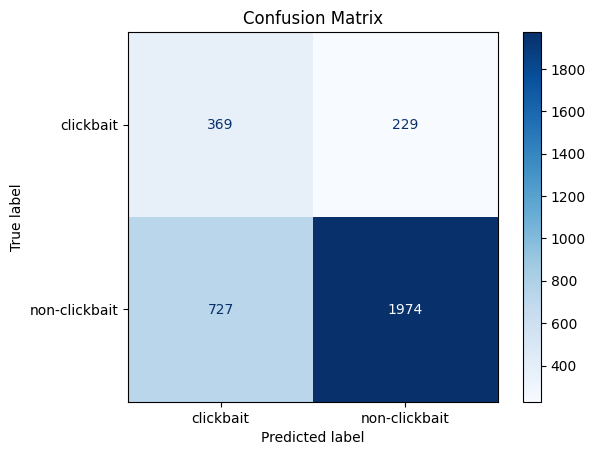

Data salah prediksi telah disimpan ke misclassified_idbert_knn.csv


In [37]:
evaluate_model('models/IndoBERT_Random Forest.pkl', features_idbert, df_test, 'misclassified_idbert_rf.csv')
evaluate_model('models/IndoBERT_Naive Bayes.pkl', features_idbert, df_test, 'misclassified_idbert_nb.csv')
evaluate_model('models/IndoBERT_SVM.pkl', features_idbert, df_test, 'misclassified_idbert_svm.csv')
evaluate_model('models/IndoBERT_KNN.pkl', features_idbert, df_test, 'misclassified_idbert_knn.csv')